In [101]:
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [102]:
img_caminho = 'img/img_teste.jpg'
img_teste = cv2.imread(img_caminho)

In [103]:
print(type(img_teste)) #RGB - Red Green Blue
print(img_teste.shape)

<class 'numpy.ndarray'>
(225, 225, 3)


In [104]:
import numpy as np

print("Minimo: ", np.min(img_teste))
print("Máximo: ", np.max(img_teste))

Minimo:  0
Máximo:  248


In [105]:
img_teste_cinza = cv2.cvtColor(img_teste, cv2.COLOR_RGB2GRAY)


Original:  (225, 225)
Redimensionada (360, 360)


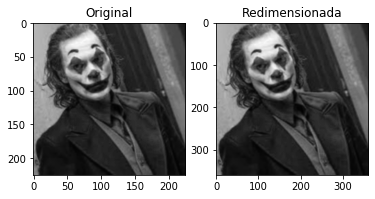

In [106]:
print('Original: ', img_teste_cinza.shape)
img_redimensionada = cv2.resize(img_teste_cinza, (360,360), interpolation=cv2.INTER_CUBIC)
print('Redimensionada', img_redimensionada.shape)

plt.subplot(121)
plt.title('Original')
plt.imshow(img_teste_cinza, cmap='gray', interpolation='bicubic')
plt.subplot(122)
plt.title('Redimensionada')
plt.imshow(img_redimensionada, cmap='gray', interpolation='bicubic')
plt.show()

[[  25]
 [  42]
 [ 114]
 [ 207]
 [ 356]
 [ 397]
 [ 437]
 [ 566]
 [ 679]
 [ 763]
 [ 837]
 [ 921]
 [1089]
 [1262]
 [1398]
 [1467]
 [1612]
 [1574]
 [1557]
 [1744]
 [1441]
 [1287]
 [1190]
 [1166]
 [1241]
 [1313]
 [1501]
 [1723]
 [1908]
 [2273]
 [2321]
 [2494]
 [2905]
 [2901]
 [2927]
 [2639]
 [2423]
 [2132]
 [2269]
 [1795]
 [1659]
 [1594]
 [1422]
 [1365]
 [1296]
 [1268]
 [1098]
 [1018]
 [ 979]
 [ 908]
 [ 843]
 [ 725]
 [ 734]
 [ 684]
 [ 577]
 [ 561]
 [ 560]
 [ 526]
 [ 535]
 [ 485]
 [ 458]
 [ 510]
 [ 462]
 [ 496]
 [ 524]
 [ 547]
 [ 663]
 [ 773]
 [1044]
 [ 845]
 [ 947]
 [ 583]
 [ 474]
 [ 480]
 [ 457]
 [ 423]
 [ 453]
 [ 440]
 [ 473]
 [ 446]
 [ 470]
 [ 525]
 [ 491]
 [ 500]
 [ 542]
 [ 494]
 [ 474]
 [ 464]
 [ 523]
 [ 498]
 [ 505]
 [ 451]
 [ 495]
 [ 445]
 [ 432]
 [ 430]
 [ 398]
 [ 376]
 [ 399]
 [ 401]
 [ 404]
 [ 401]
 [ 391]
 [ 445]
 [ 436]
 [ 402]
 [ 370]
 [ 416]
 [ 445]
 [ 479]
 [ 518]
 [ 513]
 [ 522]
 [ 535]
 [ 561]
 [ 511]
 [ 521]
 [ 515]
 [ 409]
 [ 410]
 [ 379]
 [ 306]
 [ 330]
 [ 299]
 [ 313]


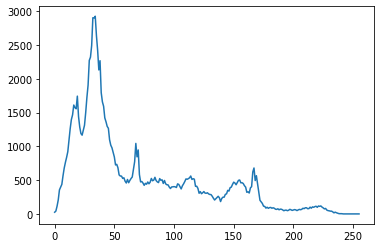

In [107]:
histograma = cv2.calcHist([img_redimensionada], [0], None, [256], [0,256])
print(histograma.astype(np.int))

plt.plot(histograma)
plt.show()

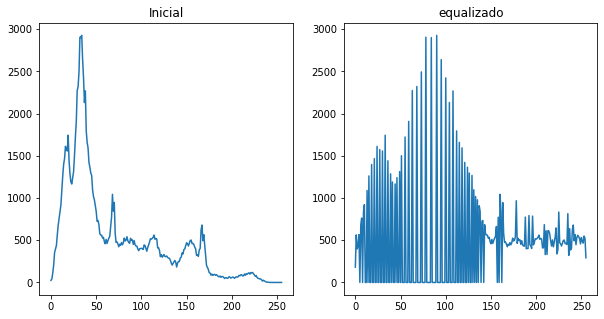

In [108]:
img_teste_equalizada = cv2.equalizeHist(img_redimensionada)
histograma_equalizado = cv2.calcHist([img_teste_equalizada], [0], None, [256], [0,256])

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Inicial')
plt.plot(histograma)
plt.subplot(122)
plt.title('equalizado')
plt.plot(histograma_equalizado)

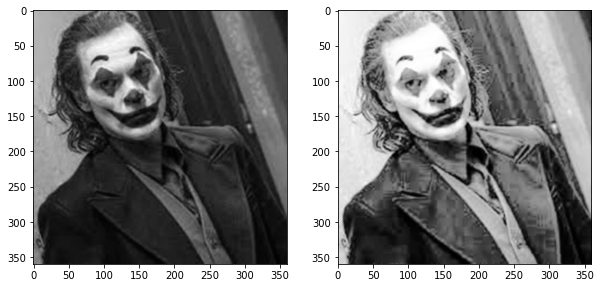

In [109]:
plt.figure(figsize = (10,10))
plt.subplot(121)
plt.imshow(img_redimensionada, cmap= 'gray', interpolation='bicubic')
plt.subplot(122)
plt.imshow(img_teste_equalizada, cmap= 'gray', interpolation='bicubic')
plt.show()

In [110]:
img_suavizada = cv2.GaussianBlur(img_teste_equalizada, (9,9), 1)
valor_retorno, img_binarizada = cv2.threshold(img_teste_equalizada, 127, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
valor_retorno_otsu, img_binarizada_otsu = cv2.threshold(img_suavizada, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

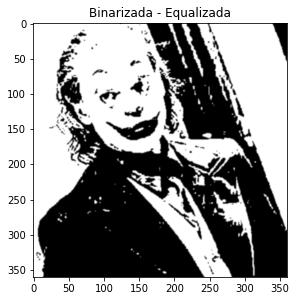

In [111]:
plt.figure(figsize = (10,10))
plt.subplot(121)
plt.title('Binarizada - Equalizada')
plt.imshow(img_binarizada, cmap = 'gray', interpolation='bicubic')

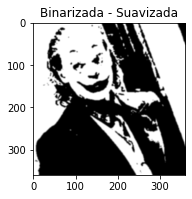

In [112]:
plt.subplot(122)
plt.title('Binarizada - Suavizada')
plt.imshow(img_binarizada_otsu, cmap = 'gray', interpolation='bicubic')

In [113]:
print("Limiar escolhido: ", valor_retorno, "Limiar OTSU:", valor_retorno_otsu)

Limiar escolhido:  126.0 Limiar OTSU: 132.0


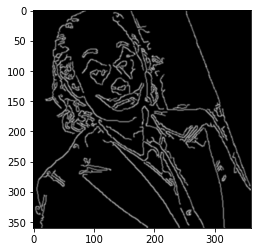

In [114]:
img_canny = cv2.Canny(img_suavizada, 100, 255)
plt.imshow(img_canny, cmap = 'gray', interpolation='bicubic')

In [27]:
def get_descritores(img_caminho):
    
    LARGURA = 360
    ALTURA = 360
    
    # Ler a imgem
    img_teste = cv2.imread(img_caminho, 0)
    
    #Redimensionar
    img_redimensionada = cv2.resize(img_teste, (LARGURA, ALTURA), interpolation=cv2.INTER_CUBIC)
    
    # Remover ruídos
    img_equalizada = cv2.equalizeHist(img_redimensionada)
    img_suavizada = cv2.GaussianBlur(img_equalizada, (9,9), 1)
    
    #Detectar pontos chaves
    orb = cv2.ORB_create(nfeatures=512)
    pontos_chave = orb.detect(img_suavizada, None)
    
    pontos_chave, descritores = orb.compute(img_suavizada, pontos_chave)
    
    return descritores,pontos_chave

Tipo:  <class 'numpy.ndarray'>
Formato descritor :  (512, 32)

 descritor[0]:  [ 11 211 227 131 246 146 239 245  93  77  94 231  88  44 254 228 127 207
 183 221 215 184  37 230  62  60 190 198 175 158 249 253]


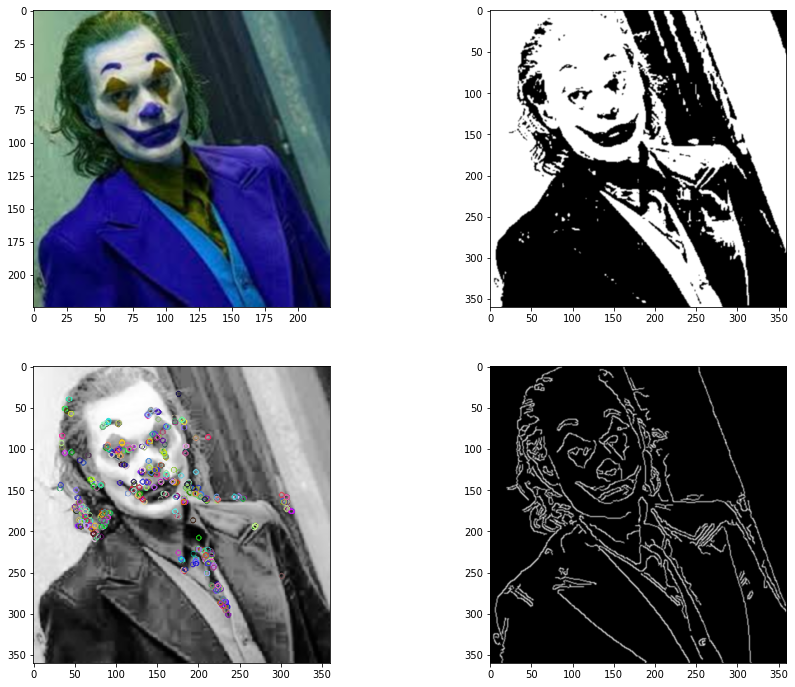

In [116]:
descritor,pontos_chave = get_descritores(img_caminho)

print("Tipo: ", type(descritor[0]))
print("Formato descritor : ", descritor.shape)
print("\n descritor[0]: ", descritor[0])

img_pontos = cv2.drawKeypoints(img_suavizada, pontos_chave, outImage = np.array([]), flags=0)
plt.figure(figsize=(15,12))
plt.subplot(221)
plt.imshow(img_teste, cmap = 'gray', interpolation='bicubic')

plt.subplot(222)
plt.imshow(img_binarizada, cmap = 'gray', interpolation='bicubic')
plt.subplot(223)
plt.imshow(img_pontos)
plt.subplot(224)
plt.imshow(img_canny, cmap = 'gray', interpolation='bicubic')

In [55]:
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
import os

QUANTIDADE_PALAVRAS_VIRTUAIS = 502

In [72]:
class PacoteDePalavras:
    
    def gerar_dicionario(self, lista_descritores):
        kmeans = KMeans(n_clusters = QUANTIDADE_PALAVRAS_VIRTUAIS)
        kmenas = kmeans.fit(lista_descritores)
        self.dicionario = kmeans.cluster_centers_
        
    def histograma_de_frequencia(self, descritor):

        try:
            algoritmo_knn = NearestNeighbors(n_neighbors = 1)
            algoritmo_knn.fit(self.dicionario)
            mais_proximos = algoritmo_knn.kneighbors(descritor, return_distance = False).flatten()

            histograma_caracteristica = np.histogram(mais_proximos, bins=np.arange(self.dicionario.shape[0]+1))[0]
        
            return histograma_caracteristica
        except AttributeError:
            print("O atributo dicionario nao foi definido")

    def salvar_dicionario(self, caminho='', nome_dicionario = 'dicionario.csv'):
        try:
            np.savetxt(os.path.join(caminho, nome_dicionario), self.dicionario, delimiter=',', fmt='%f')
            print("Dicionario salvo")
            
        except AttributeError:
            print("Dicionario Vazio")
        
    def carregar_dicionario(self, caminho='', nome_dicionario = 'dicionario.csv'):
        
        self.dicionario = np.loadtxt(os.path.join(caminho,nome_dicionario), delimiter=',')



In [73]:
teste_palavras_virtuais = PacoteDePalavras()
teste_palavras_virtuais.gerar_dicionario(descritor)
histograma_caracteristica = teste_palavras_virtuais.histograma_de_frequencia(descritor)
print(histograma_caracteristica)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 